In [1]:
from __future__ import division
from utils import *
from functions import *
from numba import autojit
%matplotlib inline

%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
# load classes
gr = GRAPH()

## LOAD DATA

In [5]:
column_names =['gammaC','nuEI','corI', 'spike','non-burst','burst', 'freq','power']
# path = os.path.expanduser("/Users/GP1514/Dropbox/ICL-2014/Code/C-Code/cortex/data/_cortex_fft_gp_1.csv")
path = os.path.expanduser("/Users/GP1514/Dropbox/ICL-2014/Code/C-Code/cortex/data/_data_6-wii500-n2500-r08.csv")
path = os.path.expanduser("/Users/GP1514/Dropbox/ICL-2014/Code/C-Code/cortex/data/_data_IAF-wii500-n2500-r08-s60.csv")
path = os.path.expanduser("/Users/GP1514/Dropbox/ICL-2014/Code/C-Code/cortex/data/_data_IAF2-wii500-n2500-r08-s60.csv")
path = os.path.expanduser("/Users/GP1514/Dropbox/ICL-2014/Code/C-Code/cortex/data/_data_IAF3-wii500-n2500-r08-s60.csv")
df = pd.read_csv(path, names= column_names ,  dtype ='float32' , sep=";")
df = df.fillna(10)
print(df.head())
df= df[(df['nuEI']<200)]
len(pd.unique(df.nuEI.ravel()))

extent = [np.min(df['gammaC']), np.max(df['gammaC']), np.min(df['nuEI']), np.max(df['nuEI'])]

   gammaC  nuEI      corI     spike  non-burst     burst       freq     power
0       0    12  0.003274  0.012157   0.009224  0.020413  39.701000  0.000228
1       0     4  0.003107  0.011552   0.009079  0.017275  23.754200  0.000207
2       0    10  0.003174  0.012002   0.009179  0.019412  35.382099  0.000478
3       0     6  0.003148  0.011682   0.009121  0.017873  33.720901  0.000176
4       0     2  0.003065  0.011382   0.009051  0.016294  29.900299  0.000237


## FIG 1. Gap junction influence network synchrony

(100, 71)
(100, 71)


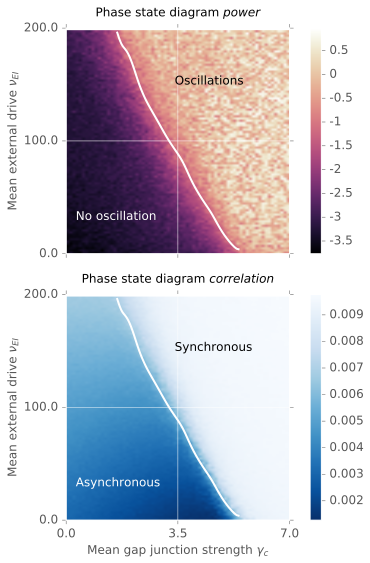

In [102]:
###################################
# bursting
###################################
fig = plt.figure(figsize=(6,8))
extent = [np.min(df['gammaC']), np.max(df['gammaC']), np.min(df['nuEI']), np.max(df['nuEI'])]
ax = fig.add_subplot(211)
dataframe = df[(df['freq']<1000)]
dataframe['logpower']= (dataframe['power']).apply(np.log10)
title = r'Phase state diagram $power$'
filename = "global_gap_junctions_bursting.pdf" 
column = 'logpower'

ax = gr.plotDiagram(fig, ax, dataframe, title, column, filename, extent=extent)

df_sliced = dataframe[(dataframe['logpower']>-1.3) & (dataframe['logpower']<-1.2)]
contour = df_sliced[['gammaC','nuEI']].get_values()
yvals, xvals = gr.bezier_curve(contour, nTimes=100)
frontier = np.array([xvals,yvals])
ax.set_ylabel(r'Mean external drive $\nu_{EI}$')
# ax.set_xlabel(r'Mean gap junction strength $\gamma_c$')
ax.set_xlabel('')
ax.set_xticklabels([])
ax.plot(frontier[1,:], frontier[0,:], '-w', linewidth=2)
ax.text(3.4,150, 'Oscillations', fontsize=12)
ax.text(0.3,30, 'No oscillation', fontsize=12, color='w')
# plt.plot(contour[:,0], contour[:,1], '.')
# plt.plot(pt[:,1], pt[:,0], '.')
# cycle  = np.load(DIRECTORY + 'cycle.npy')
# plt.plot(cycle[:,0], cycle[:,1])
# plt.savefig(DIRECTORY + 'bursting_phase_plan_cycle.pdf')


###################################
# correlation
###################################
ax = fig.add_subplot(212)

title = r'Phase state diagram $correlation$'
filename = "global_gap_junctions_bursting.pdf" 
column = 'corI'

ax = gr.plotDiagram(fig, ax, dataframe, title, column, filename, extent=extent, cmap = plt.cm.Blues_r)

ax.set_ylabel(r'Mean external drive $\nu_{EI}$')
ax.set_xlabel(r'Mean gap junction strength $\gamma_c$')

ax.plot(frontier[1,:], frontier[0,:], '-w', linewidth=2)
ax.text(3.4,150, 'Synchronous', fontsize=12)
ax.text(0.3,30, 'Asynchronous', fontsize=12, color='w')
# plt.plot(contour[:,0], contour[:,1], '.')
# plt.plot(pt[:,1], pt[:,0], '.')
# cycle  = np.load(DIRECTORY + 'cycle.npy')
# plt.plot(cycle[:,0], cycle[:,1])
plt.savefig(DIRECTORY + 'correlation_bursting.pdf')

## PLASTICITY STABILITY

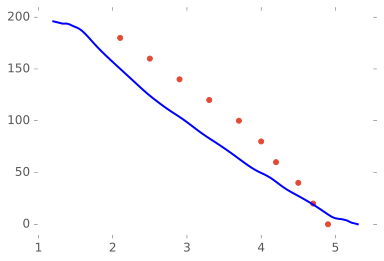

In [17]:
def overunder(df, frontier,rule):
    '''
    return 0 if fixpoint over in the SYNC regime, 1 otherwise
    '''
    ratio = 1/20 #ratio for active rule

    row = np.arange(0,200,20) #nu
    Z = []
    dist = []
    
    for j, nuEI in enumerate(row):
        f= gr.fixpoint(df, nuEI, ratio, rule)
        border = gr.frontgamma(nuEI, frontier)
        dist.append(border-f)
        Z.append(f)
    return Z, dist

Z,dist = overunder(dataframe, frontier,0)
# Z1 = Z[1] # hardbound spiking
# Z2 = Z[0] # softbound spiking
# Z3 = Z[3] # spiking non bursting 
# Z4 = Z[4] # hardbound passive rule
# Z5 = Z[5] # hardbound spiking non bursting 
plt.figure(figsize=(6,4))
plt.plot(Z,np.arange(0,200,20),'.',markersize=10, linewidth=4)
plt.plot(frontier[1,:], frontier[0,:], '-b', linewidth=2)

## PLOT PROFILE OF BURST/SPIKE FOR $\nu=50$

/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


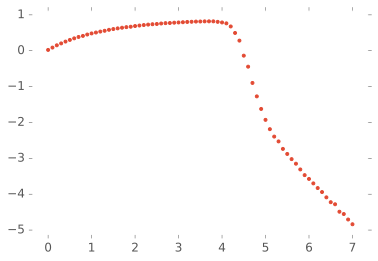

In [19]:
dv = df[ (df['nuEI']==50)]
dv['ratio'] =((dv['burst'])/dv['non-burst'])
dv['ratio'] = (dv['ratio']).apply(lambda x: (5-x)/5)
vals = dv[['gammaC', 'ratio']].get_values()
plt.figure(figsize=(6,4))
plt.plot(vals[:,0],vals[:,1], '.')

## PLOT RATIO BURSTING/SPIKING

/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(100, 52)
(100, 52)


/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


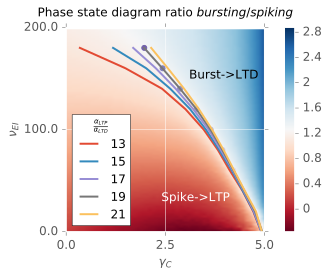

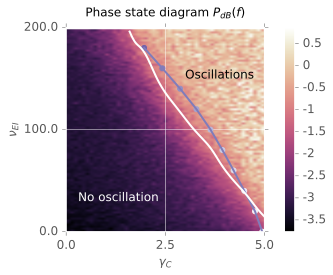

In [140]:
c=0
figsize = (6,4)
fig = plt.figure(figsize=figsize)
gridsize=60
ratio = 19
cyclePath = '/Users/GP1514/Dropbox/0000 - PhD/figures/20160129/'

# DATA
df_sliced = df[(df['freq']<1000) & (df['burst']>0.00001) & (df['gammaC']<5.2)]
g0 = 5.2
df_sliced['non-burst'] = (df_sliced[['spike', 'gammaC']]).apply(lambda x: x[0]*((g0-x[1])/g0)**1, axis=1)
df_sliced['ratio'] =((df_sliced['burst'])/df_sliced['non-burst']).apply(np.log10)
extent = [np.min(df_sliced['gammaC']), np.max(df_sliced['gammaC']), np.min(df_sliced['nuEI']), np.max(df_sliced['nuEI'])]

# RATIO
fig= plt.figure(figsize = (6,4))
dataframe = df_sliced
title = r'Phase state diagram ratio $bursting/spiking$'
filename = "global_gap_junctions_ratio_corr.pdf"
column = 'ratio'
ax = fig.add_subplot(111)
for S in range(0,200,20):
    cycle  = np.load(cyclePath + 'cycle-%d-%d.npy'%(S,ratio))
    ax.plot([np.mean(cycle[500:600,0])], [S], '.', markersize=10, color=plt.cm.Purples(S))
gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=True, gridsize=gridsize, extent = extent, cmap = plt.cm.RdBu )
steady_line = []
for ratio in range(13,22,2):
# for ratio in range(21,60,10):
    r_line = []
    for S in range(0,200,20):
        cycle  = np.load(cyclePath + 'cycle-%d-%d.npy'%(S,ratio))
        vals = cycle[480:660,0]
        x = np.mean(vals)
        asymmetric_error = [[np.min(vals)-x], [np.max(vals)-x]]
        r_line.append([x, S])
    steady_line.append([ratio,r_line])
for r in enumerate(steady_line):
    slVal = np.array(r[1][1][:])
    plt.plot(slVal[:,0], slVal[:,1], label=str(r[1][0]))
    
ax.text(3.1,150, 'Burst->LTD', fontsize=12)
ax.text(2.4,30, 'Spike->LTP', fontsize=12, color='w')
plt.legend(loc='best', title=r'$\frac{\alpha_{LTP}}{\alpha_{LTD}}$')
plt.savefig(DIRECTORY + 'steadylines.pdf')

ratio=19
# POWER
dataframe = df_sliced
dataframe['logpower'] =(dataframe['power']).apply(np.log10)
title = r'Phase state diagram $P_{dB}(f)$'
filename = "logpower_cycle.pdf"
column = 'logpower'
fig= plt.figure(figsize = (6,4))
ax = fig.add_subplot(111)
sl = []
for S in range(0,200,20):
    cycle  = np.load(cyclePath + 'cycle-%d-%d.npy'%(S,ratio))
    vals = cycle[480:660,0]
    x = np.mean(vals)
    asymmetric_error = [[np.min(vals)-x], [np.max(vals)-x]]
    ax.plot(x, S, '.', markersize=10, color=plt.cm.Purples(S))
    sl.append([x,S])
sl=np.array(sl)
ax.text(3.0,150, 'Oscillations', fontsize=12)
ax.text(0.3,30, 'No oscillation', fontsize=12, color='w')
plt.plot(sl[:,0], sl[:,1],color=plt.cm.Purples(160))
#     ax.plot(Z,np.arange(0,200,20),'.',markersize=10, linewidth=4, color=plt.cm.Reds(S))
ax.plot(frontier[1,:], frontier[0,:], '-w', linewidth=2)
# cycle  = np.load(DIRECTORY + 'cycle-80-19.npy')
# ax.plot(cycle[:,0], cycle[:,1])
#     ax.errorbar(x, S, xerr=asymmetric_error, fmt='o')
gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=True, gridsize=gridsize, extent = extent )


# ########
# ### CYCLE 
# ########
# # DATA
# df_sliced = df[(df['freq']<1000) & (df['burst']>0.00001) & (df['gammaC']<5.2) & (df['gammaC']>2.5) & (df['nuEI']<100)]
# g0 = 5.2
# df_sliced['non-burst'] = (df_sliced[['spike', 'gammaC']]).apply(lambda x: x[0]*((g0-x[1])/g0)**1, axis=1)
# df_sliced['ratio'] =((df_sliced['burst'])/df_sliced['non-burst']).apply(np.log10)
# extent = [np.min(df_sliced['gammaC']), np.max(df_sliced['gammaC']), np.min(df_sliced['nuEI']), np.max(df_sliced['nuEI'])]

# # RATIO
# fig= plt.figure(figsize = (6,4))
# dataframe = df_sliced
# title = r'Gap junction strength cycle'
# column = 'ratio'
# ax = fig.add_subplot(111)
# for S in range(0,100,20):
#     cycle  = np.load(cyclePath + 'cycle-%d-%d.npy'%(S,ratio))
#     ax.plot([np.mean(cycle[500:600,0])], [S], '.', markersize=10, color=plt.cm.Purples(S+100))
# gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize=gridsize, extent = extent, cmap = plt.cm.RdBu )
    
# ax.text(3.1,150, 'Burst->LTD', fontsize=12)
# ax.text(2.4,30, 'Spike->LTP', fontsize=12, color='w')
# cycle  = np.load(DIRECTORY + 'cycle-80-19.npy')
# ax.plot(cycle[:,0], cycle[:,1])

# plt.savefig(DIRECTORY + 'cycle_gamma.pdf')




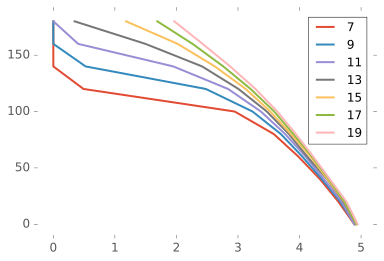

In [67]:
# VAR RATIO
fig= plt.figure(figsize = (6,4))
steady_line = []
for ratio in range(7,21,2):
    r_line = []
    for S in range(0,200,20):
        cycle  = np.load(cyclePath + 'cycle-%d-%d.npy'%(S,ratio))
        vals = cycle[480:660,0]
        x = np.mean(vals)
        asymmetric_error = [[np.min(vals)-x], [np.max(vals)-x]]
        r_line.append([x, S])
    steady_line.append([ratio,r_line])
for r in enumerate(steady_line):
    slVal = np.array(r[1][1][:])
    plt.plot(slVal[:,0], slVal[:,1], label=str(r[1][0]))
plt.legend()


In [11]:
S=80
cycle  = np.load('/Users/GP1514/Dropbox/0000 - PhD/figures/20160127/' + 'cycle-%d.npy'%S)
np.min(cycle[500:600,0])
[np.min(vals), np.max(vals)]

[4.4951400000000001, 4.6355300000000002]

In [12]:
##### INDIV PLOTS

c=0
figsize = (20,10)
fig = plt.figure(figsize=figsize)
gridsize=60

extent= [0,7,30,230]
###################################
# spiking
###################################
dataframe = df[(df['freq']<1000)]
title = r'Phase state diagram $spiking$'
filename = "global_gap_junctions_c%d_spiking.pdf" %c
column = 'non-burst'
ax = fig.add_subplot(231)
gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize=gridsize, extent=extent )

###################################
# bursting
###################################
dataframe = df[(df['freq']<1000)]
title = r'Phase state diagram $bursting$'
filename = "global_gap_junctions_c%d_bursting.pdf" %c
dataframe['logburst'] =(dataframe['burst']).apply(np.log10)
column = 'logburst'
ax = fig.add_subplot(232)
gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize=gridsize, extent=extent )

###################################
# ratio
###################################
df_sliced = df[(df['freq']<1000) & (df['burst']>0.00001)]
df_sliced['ratio'] =((df_sliced['burst'])/df_sliced['non-burst']).apply(np.log10)
dataframe = df_sliced
title = r'Phase state diagram ratio $bursting/spiking$'
filename = "global_gap_junctions_c%d_ratio.pdf"
column = 'ratio'
ax = fig.add_subplot(233)
gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize=gridsize , extent=extent)

# ###################################
# # corI
# ###################################
# dataframe = df[(df['freq']<1000)]
# title = r'Phase state diagram $corI$')
# filename = "global_gap_junctions_c%d_corI.pdf" %c
# column = 'corI'
# fig = plt.figure(figsize=figsize)
# ax = fig.add_subplot(111)
# plotDiagram(fig, ax, dataframe, title, column, filename)

###################################
# power
###################################
dataframe = df[(df['freq']<1000)]
ttl = r'Phase state diagram $P_dB(f)$'
filename = "global_gap_junctions_c%d_power.pdf" %c
dataframe['logpower'] =(dataframe['power']).apply(np.log10)
column = 'logpower'
ax = fig.add_subplot(234)
gr.plotDiagram(fig, ax, dataframe, ttl, column, filename, save=None, front=False, gridsize=gridsize, extent=extent )

###################################
# power freq
###################################
dataframe = df[(df['freq']<1000)]
dataframe['logpower'] =(dataframe['power']).apply(np.log10)
# dataframe = dataframe[(dataframe['logpower']>-1)]
title = r'Phase state diagram $freq  Pdb>0.1$'
filename = "global_gap_junctions_c%d_power_freq.pdf" %c
column = 'freq'
ax = fig.add_subplot(235)
gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None,  front=False, gridsize=gridsize,  extent=extent )
plt.tight_layout()
plt.savefig(DIRECTORY + 'all-diagrams.pdf')
plt.savefig(DIRECTORY + 'all-diagrams')

(85, 71)
(85, 71)
(85, 71)
(85, 71)
(85, 71)


(85, 71)


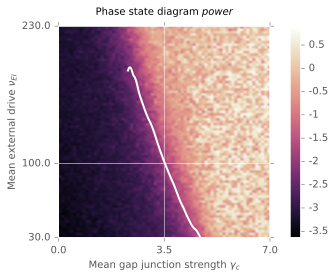

In [21]:
### FUNCTION to get values of gamma returning nearest value of power

# pt = np.zeros(shape=(100,2))
# for i in range(100):
#     da = dataframe[(dataframe['nuEI']==(2*i))]
#     da['logpower']= (da['power']).apply(np.log10)
#     try:
#         val = da[['logpower']].get_values()
#         pt[i,:]=[2*i,gr.find_nearest(val, -1.5,dataframe)[2]]
#     except: 
#         print(2*i)
#         pass

In [22]:
# # contour = np.array(contour)
# # yvals, xvals = bezier_curve(contour, nTimes=100)
# # frontier = np.array([xvals,yvals])

# # plt.plot(frontier[1,:], frontier[0,:], '-w', linewidth=2)
# # plt.plot(contour[:,0], contour[:,1], '.')

# frontgamma(60,frontier)
print(gr.fixpoint(df,100, 0.89, 5))

0


In [23]:
# for i in range(6):
#     print(np.mean(Z[i]))
    
# print(Z1[20])

In [14]:
# @autojit
def overunder(df, frontier, rule):
    '''
    return 0 if fixpoint over in the SYNC regime, 1 otherwise
    '''
    if rule in [0,1,5,3]:
        col = np.arange(0,2,0.05) #ratio for active rule
    else:
        col = np.arange(0,120,3) #ratio for passive rule
    row = np.arange(50,200,1) #nu
    Z = np.zeros(shape=(len(row),len(col)))
    for i,ratio in enumerate(col):
        for j, nuEI in enumerate(row):
            f= gr.fixpoint(df, nuEI, ratio, rule,5)
            border = gr.frontgamma(nuEI, frontier)
            Z[len(row)-1-j,len(col)-1-i] = (border-f)*((border>f) and (f>1) and (nuEI>48))*1.0
    return Z

Z = Parallel(n_jobs=num_cores)(delayed(overunder)(dataframe, frontier,i) for i in range(6))

Z1 = Z[1] # hardbound spiking
Z2 = Z[0] # softbound spiking
Z3 = Z[3] # spiking non bursting 
Z4 = Z[4] # hardbound passive rule
Z5 = Z[5] # hardbound spiking non bursting 
Zpassive = Z[2] # softbound passive rule (all non bursting neurons are potentiated)

##$ratio = \frac{LTD}{LTP}$

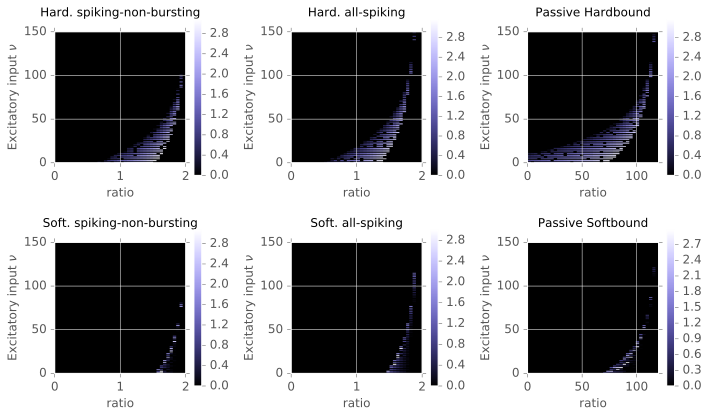

In [15]:
'''
Plot the \dot(gamma) as function of \gamma for hardbound
'''

matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)
matplotlib.rc('axes', labelsize = 12)
matplotlib.rc('axes', titlesize = 12)
matplotlib.rc('lines', linewidth=2)

cx_blue = cubehelix.cmap(reverse=False, start=3., rot=0)

fig = plt.figure(figsize=(10,6))

extent1 = [0,2.0,0,150]
extent2 = [0,120,0,150]

ax6 = fig.add_subplot(232)
ax6.set_xlabel('ratio')
ax6.set_ylabel(r'Excitatory input $\nu$')
ax6.set_title('Hard. all-spiking', y=1.08)
# ax6.set_yticks([0,50,100,150])
# ax6.set_yticklabels([50,100,150,200])
cx4 = cubehelix.cmap(reverse=False, start=0., rot=0.5)
image = ax6.imshow(Z1, interpolation='nearest', extent=extent1,cmap=cx_blue, aspect=2/150)#, cmap =cx4)# drawing the function
plt.colorbar(image)

ax5 = fig.add_subplot(231)
ax5.set_xlabel('ratio')
ax5.set_ylabel(r'Excitatory input $\nu$')
ax5.set_title('Hard. spiking-non-bursting', y=1.08)
# ax5.set_yticks([0,50,100,150])
# ax5.set_yticklabels([50,100,150,200])
image = ax5.imshow(Z5, interpolation='nearest', extent=extent1, cmap=cx_blue, aspect=2/150)#, cmap =cx4)# drawing the function
plt.colorbar(image)

# plt.savefig(DIRECTORY + 'soft_vs_hard_all.pdf')

ax7 = fig.add_subplot(233)
ax7.set_xlabel('ratio')
ax7.set_ylabel(r'Excitatory input $\nu$')
ax7.set_title('Passive Hardbound', y=1.08)
# ax7.set_yticks([0,50,100,150])
# ax7.set_yticklabels([50,100,150,200])
cx4 = cubehelix.cmap(reverse=False, start=0., rot=0.5)
image = ax7.imshow(Z4, interpolation='nearest', extent=extent2,cmap=cx_blue, aspect=120/150)#, cmap =cx4)# drawing the function
plt.colorbar(image)
# plt.tight_layout()
# plt.savefig(DIRECTORY + 'hardbound.pdf')

'''
plot the \dot(gamma) as function of \gamma for hardbound and softbound eLTP and for two excitatory input levels
'''

ax6 = fig.add_subplot(235)
ax6.set_xlabel('ratio')
ax6.set_ylabel(r'Excitatory input $\nu$')
ax6.set_title('Soft. all-spiking', y=1.08)
# ax6.set_yticks([0,50,100,150])
# ax6.set_yticklabels([50,100,150,200])
cx4 = cubehelix.cmap(reverse=False, start=0., rot=0.5)
image = ax6.imshow(Z2, interpolation='nearest', extent=extent1,cmap=cx_blue, aspect=2/150)#, cmap =cx4)# drawing the function
plt.colorbar(image)

ax5 = fig.add_subplot(234)
ax5.set_xlabel('ratio')
ax5.set_ylabel(r'Excitatory input $\nu$')
ax5.set_title('Soft. spiking-non-bursting', y=1.08)
# ax5.set_yticks([0,50,100,150])
# ax5.set_yticklabels(tk)
image = ax5.imshow(Z3, interpolation='nearest', extent=extent1, cmap=cx_blue, aspect=2/150)#, cmap =cx4)# drawing the function
plt.colorbar(image)

ax7 = fig.add_subplot(236)
ax7.set_xlabel('ratio')
ax7.set_ylabel(r'Excitatory input $\nu$')
ax7.set_title('Passive Softbound', y=1.08)
# ax7.set_yticks([0,50,100,150])
# ax7.set_yticklabels(tk)
cx4 = cubehelix.cmap(reverse=False, start=0., rot=0.5)
image = ax7.imshow(Zpassive, interpolation='nearest', extent=extent2,cmap=cx_blue, aspect=120/150)#, cmap =cx4)# drawing the function
plt.colorbar(image)
plt.tight_layout()
plt.savefig(DIRECTORY + 'soft_hard_horizontal.pdf')

## Position of the FP($\gamma$) for a fixed ratio

/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


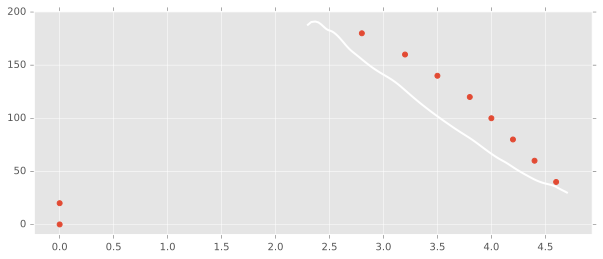

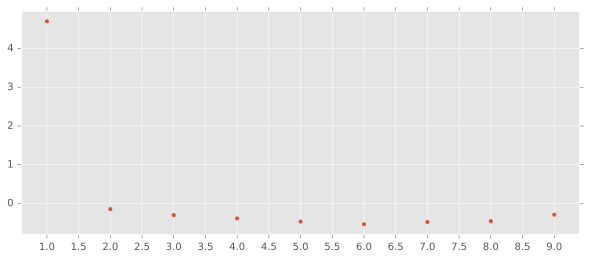

In [27]:
plt.plot(dist,'.')